## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPARATION

In [ ]:
import pandas as pd

---

## Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [ ]:
path = "/content/drive/MyDrive/Cognizant AI Program/Task 3/Resources/"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

## Clean Data

In [ ]:
sales_df.info()
print()
stock_df.info()
print()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           

convert timestamp object to datetime type

In [ ]:
def to_datatime(data: pd.DataFrame=None, column: str=None):
  new_data = data
  new_data[column] = pd.to_datetime(new_data[column], format='%Y-%m-%d %H:%M:%S')
  return new_data

In [ ]:
sales_df = to_datatime(data=sales_df, column='timestamp')
sales_df.info()
print()
stock_df = to_datatime(data=stock_df, column='timestamp')
stock_df.info()
print()
temp_df = to_datatime(data=temp_df, column='timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id         

## Merge Data

To include all 3 tables within a predictive model, we need to merge data.

The problem statement states: 

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”
```
The client wants the model to predict on hourly basis. Looking at the model, the only column that we can use to merge 3 tables is timestamp. 

Since it's hourly basis,  we can first transform timestamp to be based on hour of the date (i.e 2022-03-02 09:00:00). Then, merge 3 tables together.

In [ ]:
from time import strftime
# covert to hour of the date
from datetime import datetime

def to_hour(data: pd.DataFrame=None, col: str= None):
  new_data = data
  for row in range(0, len(new_data[col])):
    x = new_data[col][row].strftime('%Y-%m-%d %H:00:00') # covert datetime object to its equivalent string 
    new_data[col][row]= datetime.strptime(x, '%Y-%m-%d %H:00:00') # the first argument must be string
  return new_data

In [ ]:
sales_df = to_hour(data =sales_df, col='timestamp')
print(sales_df.head())
stock_df = to_hour(data =stock_df, col='timestamp')
print(stock_df.head())
temp_df = to_hour(data =temp_df, col='timestamp')
print(temp_df.head())

<ipython-input-9-97ef78d574a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col][row]= datetime.strptime(x, '%Y-%m-%d %H:00:00') # the first argument must be string


                         transaction_id           timestamp  \
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed 2022-03-02 09:00:00   
1  931ad550-09e8-4da6-beaa-8c9d17be9c60 2022-03-06 10:00:00   
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea 2022-03-04 17:00:00   
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4 2022-03-02 17:00:00   
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514 2022-03-05 14:00:00   

                             product_id category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
1  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    fruit      standard        3.99   
2  7c55cbd4-f306-4c04-a030-628cbe7867c1    fruit       premium        0.19   
3  80da8348-1707-403f-8be7-9e6deeccc883    fruit          gold        0.19   
4  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d    fruit         basic        4.49   

   quantity  total payment_type  
0         2   7.98     e-wallet  
1         1   3.99     e-wallet  
2         2   0.38     e-wallet  
3         4   0.

<ipython-input-9-97ef78d574a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col][row]= datetime.strptime(x, '%Y-%m-%d %H:00:00') # the first argument must be string


                                     id           timestamp  \
0  4220e505-c247-478d-9831-6b9f87a4488a 2022-03-07 12:00:00   
1  f2612b26-fc82-49ea-8940-0751fdd4d9ef 2022-03-07 16:00:00   
2  989a287f-67e6-4478-aa49-c3a35dac0e2e 2022-03-01 18:00:00   
3  af8e5683-d247-46ac-9909-1a77bdebefb2 2022-03-02 14:00:00   
4  08a32247-3f44-4002-85fb-c198434dd4bb 2022-03-02 13:00:00   

                             product_id  estimated_stock_pct  
0  f658605e-75f3-4fed-a655-c0903f344427                 0.75  
1  de06083a-f5c0-451d-b2f4-9ab88b52609d                 0.48  
2  ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8                 0.58  
3  c21e3ba9-92a3-4745-92c2-6faef73223f7                 0.79  
4  7f478817-aa5b-44e9-9059-8045228c9eb0                 0.22  


<ipython-input-9-97ef78d574a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col][row]= datetime.strptime(x, '%Y-%m-%d %H:00:00') # the first argument must be string


                                     id           timestamp  temperature
0  d1ca1ef8-0eac-42fc-af80-97106efc7b13 2022-03-07 15:00:00         2.96
1  4b8a66c4-0f3a-4f16-826f-8cf9397e9d18 2022-03-01 09:00:00         1.88
2  3d47a0c7-1e72-4512-812f-b6b5d8428cf3 2022-03-04 15:00:00         1.78
3  9500357b-ce15-424a-837a-7677b386f471 2022-03-02 12:00:00         2.18
4  c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa 2022-03-05 09:00:00         1.38


In [ ]:
sales_agg = sales_df.groupby(['timestamp','product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


Use stock table as base to merge other 2 talbes into it.

In [ ]:
merged_df = stock_agg.merge(sales_agg, on = ['timestamp', 'product_id'], how='left') # left means the stock_agg. Merge to the left.
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merged_df = merged_df.merge(temp_agg, on = ['timestamp'], how='left') # left means the stock_agg. Merge to the left.
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Replace Null value to 0

In [ ]:
 merged_df['quantity'] = merged_df['quantity'].fillna(0)
 merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


Merge 'category' and 'unit_price' into merged_df

In [ ]:
# drop duplicates due to merge table using keys
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [ ]:
merged_df = merged_df.merge(product_categories, on=['product_id'], how='left')
merged_df = merged_df.merge(product_price, on=['product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


# DATA PREPROCESSING

## Keep useful features (extract and create features)

We have our cleaned and merged data. Now we must transform this data so that the columns are in a suitable format for a machine learning model. In other terms, every column must be numeric.

In [ ]:
# transform datetime features to 
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_weekday'] = merged_df['timestamp'].dt.weekday
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             10845 non-null  float64
 1   quantity                        10845 non-null  float64
 2   temperature                     10845 non-null  float64
 3   unit_price                      10845 non-null  float64
 4   timestamp_day_of_month          10845 non-null  int64  
 5   timestamp_weekday               10845 non-null  int64  
 6   timestamp_hour                  10845 non-null  int64  
 7   category_baby products          10845 non-null  uint8  
 8   category_baked goods            10845 non-null  uint8  
 9   category_baking                 10845 non-null  uint8  
 10  category_beverages              10845 non-null  uint8  
 11  category_canned foods           10845 non-null  uint8  
 12  category_cheese                 

In [ ]:
# create dummy variables for categorical data
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

KeyError: ignored

In [ ]:
merged_df.info()

In [ ]:
#Drop product id column since we are not use it for prediction
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

# MODEL BUILDING

First, we will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Second, whilst training the machine learning model, we will use cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, we will test the trained model several times on random samples of data. Hence, we will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

In [ ]:
# create our target variable `y` and independent variables `X`

y = merged_df['estimated_stock_pct']
X = merged_df.drop(columns=['estimated_stock_pct'])
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


Then, we will define how many folds we want to complete during training, and how much of the dataset to assign to training, leaving the rest for test.


In [ ]:
k = 10
split = 0.75

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

Train `K` models with a 75/25% random split of the data each time between training and test samples

The `MAE` was chosen as a performance metric because it describes how closely the machine learning model was able to predict the exact value of `estimated_stock_pct`.

In [ ]:
accuracy =[]
for fold in range(0, k):
  # Create training and test sample dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Instantiate algorithm
  scaler = StandardScaler()
  model = RandomForestRegressor()

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")
print('Accuracy:', 1- (sum(accuracy) / len(accuracy))*2)


Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.237
Fold 4: MAE = 0.236
Fold 5: MAE = 0.238
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.237
Fold 10: MAE = 0.236
Average MAE: 0.24
accuracy: 0.5266261123477688


At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the the dataset needs to be further engineered, or more datasets need to be added.

As a final note, we can use the trained model to intepret which features were signficant when the model was predicting the target variable. We will use `matplotlib` and `numpy` to visualuse the results, so we should install and import this package.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
features = [i for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances) # calculate an indirect sort along the specified axis. provide you how to sort numbers.
print(importances)
print(indices)

[0.08316215 0.16640587 0.2856738  0.04966568 0.04942645 0.10933768
 0.01364122 0.01458558 0.01297158 0.01385249 0.0123527  0.01392473
 0.01413253 0.01324215 0.01028458 0.01551443 0.00720839 0.0105806
 0.00967341 0.00902194 0.01046425 0.01561613 0.01007525 0.01032174
 0.01015215 0.0099975  0.01061634 0.00809865]
[16 27 19 18 25 22 24 14 23 20 17 26 10  8 13  6  9 11 12  7 15 21  4  3
  0  5  1  2]


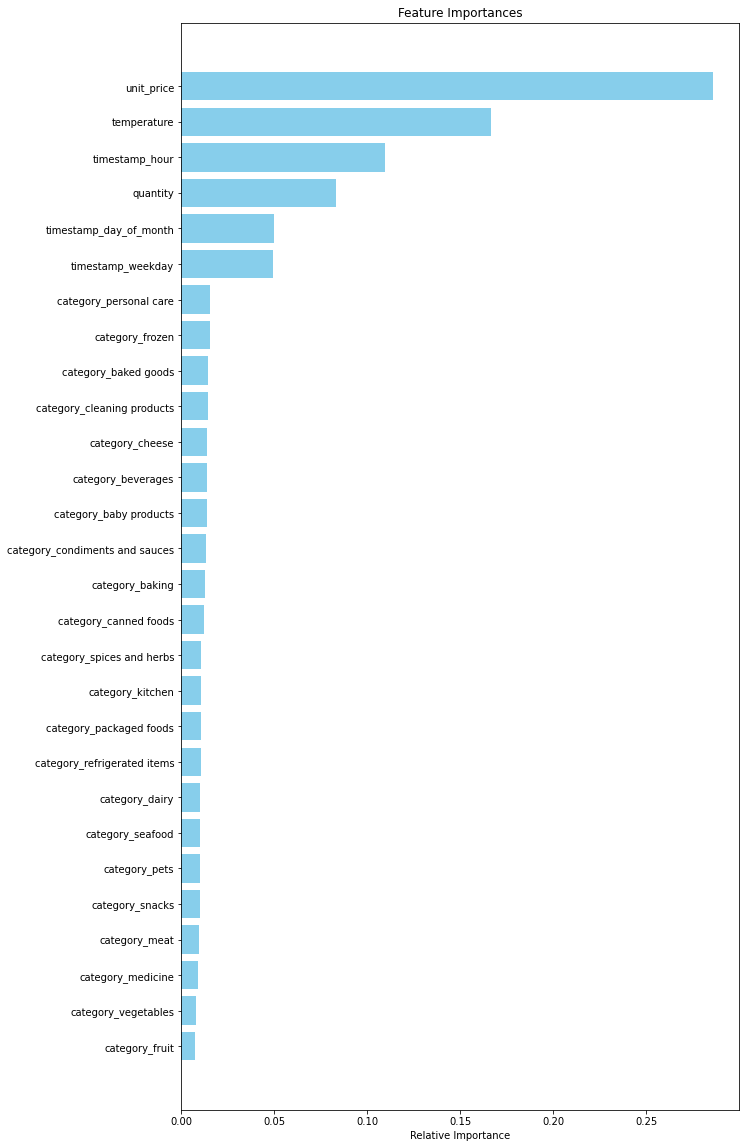

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#87CEEB', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The feature importance visualisation indicates:

- The product categories were not that important
- The unit price and temperature were important in predicting stock
- The hour of day was also important for predicting stock

With these insights, we can now report this back to the business